In [1]:
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [3]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [4]:
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [5]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


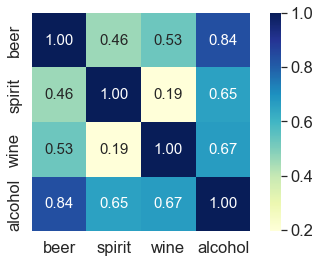

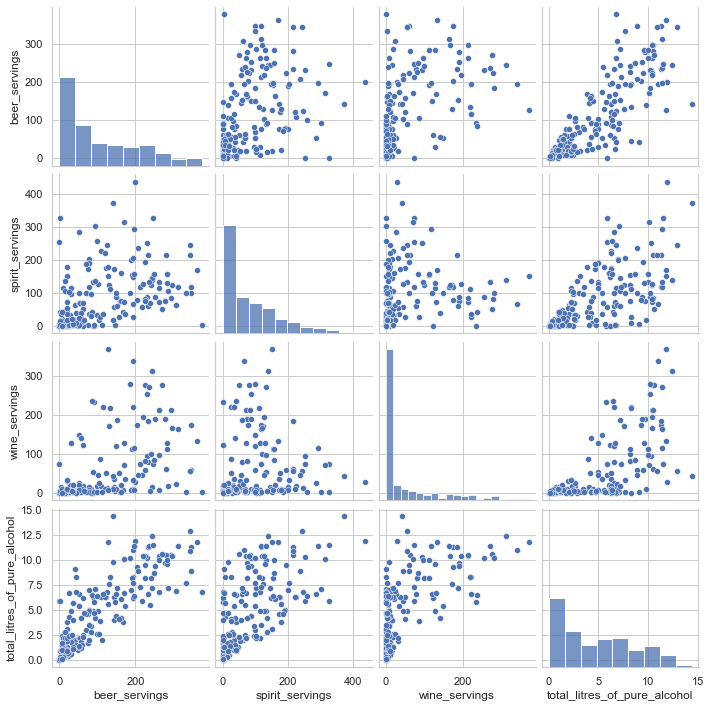

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.5)
# 그래프 출력을 위한 cols 이름
cols_view = ['beer', 'spirit', 'wine', 'alcohol']
#cbar 히트맵 바 출력여부, annot 상관 계수 출력여부
#square 사각형의 형태, fmt 소수점 자리수
#annot_kws 상관계수 폰트 크기, yticklabels y레이블명, xticklabels x레이블명
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt='.2f',
                annot_kws = {'size': 15},
                yticklabels = cols_view,
                xticklabels = cols_view,
                cmap = "YlGnBu")
plt.tight_layout()
plt.show()

#시각화 라이브러리를 이용한 피처 간의 산점도 그래프를 출력합니다.
sns.set(style = 'whitegrid', context = 'notebook')
sns.pairplot(drinks[['beer_servings','spirit_servings',
                    'wine_servings','total_litres_of_pure_alcohol']],height = 2.5)
plt.show()

In [7]:
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [8]:
drinks['continent'].value_counts().index.tolist()
drinks['continent'].value_counts().values.tolist()

[53, 45, 44, 23, 16, 12]

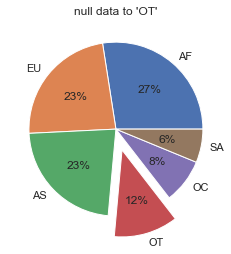

In [9]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=0)
plt.title('null data to \'OT\'')
plt.show()

- agg()함수는 apply()함수와 거의 동일하게 함수 파라미터를 받음
- agg()함수는 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러가지 연산 결과를 동시에 얻을 수 있는 함수
- agg()함수를 이용해 'mean','min','max','sum' 사용

In [10]:
#대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


### 2.전체 평균보다 많은 알코올을 섭취하는 대륙
- 2-1: 전체 알코올 섭취 평균
- 2-2: 대륙별 알코올 섭취 평균
- 2-3: 대륙별 알코올 섭취 평균이 전체 알코올 섭취 평균보다 높은 대륙을 구하기

In [11]:
#전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [12]:
# # 2-1 전체 알코올 섭취 평균
# drinks.total_litres_of_pure_alcohol.mean()
# # 2-2 대륙별 알코올 섭취 평균
# # drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# total_mean = drinks.total_litres_of_pure_alcohol.mean()
# continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
# #데이터프레임[조건]
# continent_over_mean = continent_mean[continent_mean >= total_mean]
# print(continent_over_mean)

### 3.평균 beer_servings이 가장 높은 대륙

- idxmin, idmax 는 전체 인덱스 중 최소값, 최대값을 반환
- 3-1: 대륙별 평균 beer_servings 계산
- 3-2: 결과 중 값이 가장 높은 인덱스만 추출

In [13]:
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


<function matplotlib.pyplot.show(close=None, block=None)>

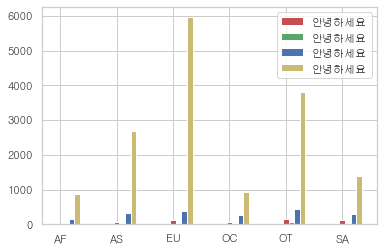

In [25]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='안녕하세요')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='안녕하세요')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='안녕하세요')
rects3 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='안녕하세요')

plt.xticks(index,result.index.tolist())
plt.legend()
plt.show

In [24]:
drinks.to_csv("drinks_bigdata.csv")